⏳ Downloading dataset...
✅ Dataset downloaded at: /kaggle/input/social-media-sentiments-analysis-dataset
📄 First few rows of data:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Faceb

<ipython-input-3-1896976083>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="pastel")


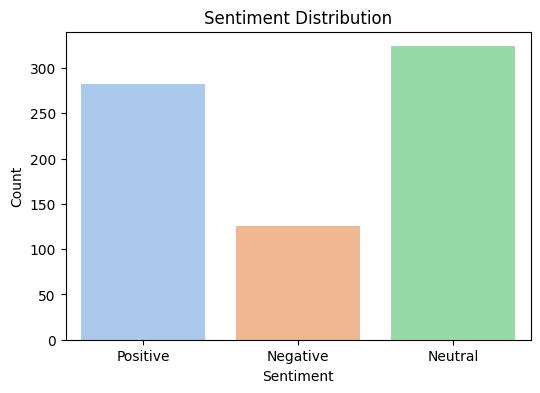

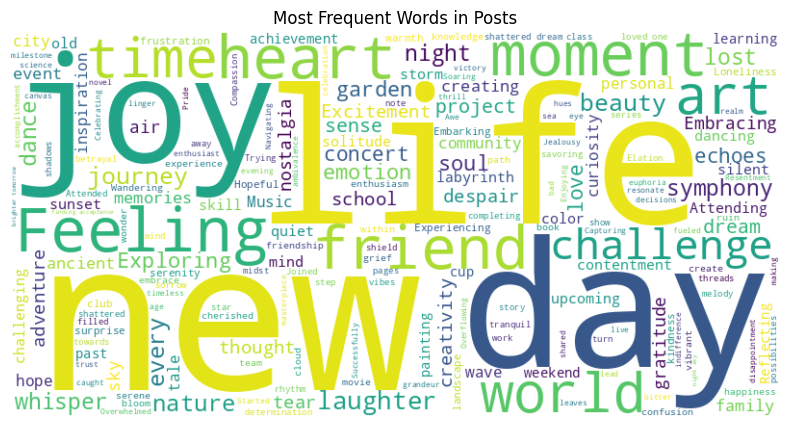

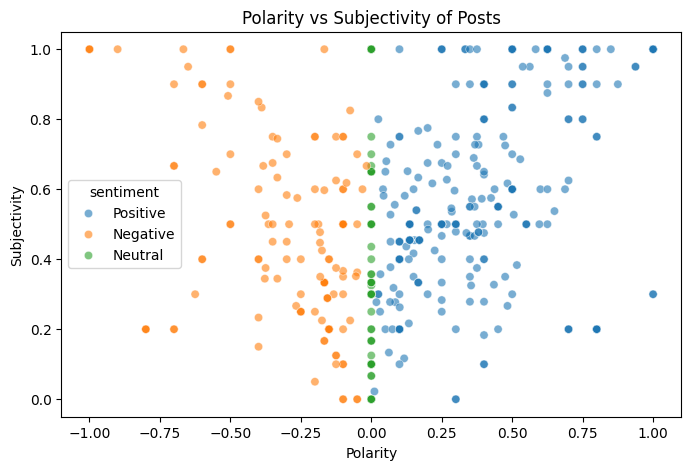

In [3]:
# ---------------------------------------------------------
# 📊 Social Media Sentiment Analysis using Python
# 🔍 Dataset: Social Media Sentiments (from Kaggle)
# ✨ Purpose: Understand trending topics and sentiments
# 🛠️ Tools: pandas, seaborn, matplotlib, TextBlob
# ---------------------------------------------------------

# 📦 Import required libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# ---------------------------------------------------------
# 📥 Load Dataset from KaggleHub
# ---------------------------------------------------------
print("⏳ Downloading dataset...")
path = kagglehub.dataset_download("kashishparmar02/social-media-sentiments-analysis-dataset")
print("✅ Dataset downloaded at:", path)

# Load CSV file from dataset path
df = pd.read_csv(f'{path}/sentimentdataset.csv')
print("📄 First few rows of data:")
print(df.head())

# ---------------------------------------------------------
# 🧹 Data Preprocessing & Sentiment Scoring
# ---------------------------------------------------------
df.dropna(subset=["Text"], inplace=True)  # Remove rows with missing content

# Add sentiment polarity and subjectivity
df["polarity"] = df["Text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["subjectivity"] = df["Text"].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Classify sentiment
def classify_sentiment(p):
    if p > 0:
        return "Positive"
    elif p < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["polarity"].apply(classify_sentiment)

# ---------------------------------------------------------
# 📊 Visualization - Sentiment Distribution
# ---------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sentiment", palette="pastel")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ---------------------------------------------------------
# ☁️ Visualization - Word Cloud
# ---------------------------------------------------------
all_text = " ".join(df["Text"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Posts")
plt.show()

# ---------------------------------------------------------
# 📈 Visualization - Polarity vs Subjectivity
# ---------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="polarity", y="subjectivity", hue="sentiment", alpha=0.6)
plt.title("Polarity vs Subjectivity of Posts")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

## Preprocessing

### Subtask:
Clean the text data by removing special characters, numbers, and stopwords.


**Reasoning**:
Define a function to clean the text data by removing special characters, numbers, and stopwords, and then apply this function to the 'Text' column to create a 'cleaned_text' column.



In [4]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)

display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,polarity,subjectivity,sentiment,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,0.750000,0.800000,Positive,enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,-1.000000,1.000000,Negative,traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,0.750000,0.900000,Positive,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,0.468750,0.750000,Positive,excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,0.136364,0.454545,Positive,trying new recipe dinner tonight


## Tokenization and vectorization

### Subtask:
Convert the cleaned text data into numerical representations using techniques like TF-IDF or Count Vectorization.


**Reasoning**:
Convert the cleaned text data into numerical representations using TF-IDF.



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

print("Shape of TF-IDF features:", tfidf_features.shape)

Shape of TF-IDF features: (732, 2468)


## Model selection

### Subtask:
Choose an appropriate machine learning model for sentiment classification (e.g., Naive Bayes, SVM, Logistic Regression).


## Model training

### Subtask:
Split the data into training and testing sets and train the selected model (Logistic Regression).


**Reasoning**:
Split the data into training and testing sets and train the Logistic Regression model.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target
X = tfidf_features
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Model evaluation

### Subtask:
Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Evaluate the trained model using accuracy, precision, recall, and F1-score by making predictions on the test set and calculating the metrics.



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6175
Precision: 0.6691
Recall: 0.6175
F1-score: 0.5751


## Prediction and analysis

### Subtask:
Use the trained model to predict sentiment on new data and analyze the results.


**Reasoning**:
Use the trained model to predict sentiment on the test data, add the predictions to the test set dataframe, and display a few examples along with a classification report and confusion matrix to analyze the results as per the instructions.



Examples of Actual vs Predicted Sentiment:
    actual_sentiment predicted_sentiment
604         Negative            Positive
33           Neutral             Neutral
300         Negative             Neutral
457         Positive             Neutral
634         Positive            Positive

Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.09      0.16        33
     Neutral       0.55      0.88      0.68        81
    Positive       0.76      0.57      0.65        69

    accuracy                           0.62       183
   macro avg       0.69      0.51      0.50       183
weighted avg       0.67      0.62      0.58       183


Confusion Matrix:


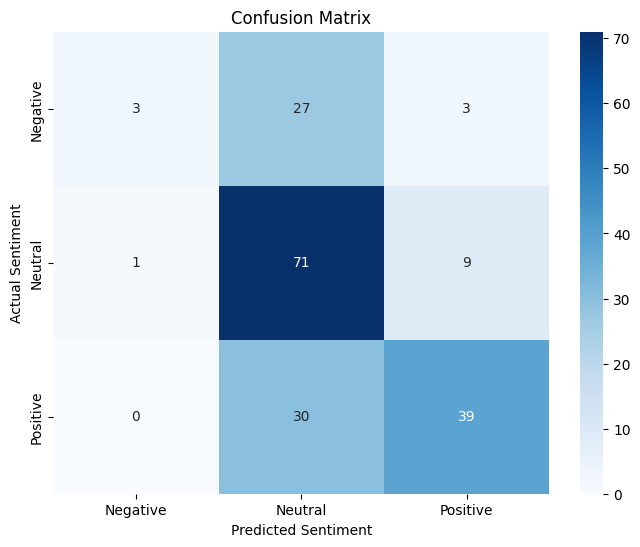

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict sentiment on the test set
y_pred = model.predict(X_test)

# Add predicted sentiment to a copy of the test set DataFrame for comparison
y_test_df = y_test.to_frame(name='actual_sentiment')
# Align the index of y_test_df with X_test if they are not already aligned
# Assuming X_test is a sparse matrix and its original indices are not preserved
# We can create a new DataFrame for comparison using original df indices if needed,
# but for simplicity here we'll just add the prediction to the y_test Series converted to df
y_test_df['predicted_sentiment'] = y_pred

# Display a few examples
print("Examples of Actual vs Predicted Sentiment:")
print(y_test_df.head())

# Generate Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The text data was cleaned by converting text to lowercase, removing non-alphabetic characters, numbers, and stopwords.
*   The cleaned text was vectorized using TF-IDF, resulting in a feature matrix with a shape of (732, 2468).
*   A Logistic Regression model was selected and trained on 75% of the vectorized data.
*   The trained model achieved an accuracy of 0.6175, a weighted precision of 0.6691, a weighted recall of 0.6175, and a weighted F1-score of 0.5751 on the test set.
*   The model performed best in predicting 'Neutral' sentiment (88% recall) and struggled significantly with identifying 'Negative' sentiment (9% recall).

### Insights or Next Steps

*   The current model struggles to identify negative sentiment. Further steps could involve exploring techniques to address class imbalance or using different models better suited for imbalanced datasets.
*   Analyzing the specific misclassified negative examples might reveal patterns or characteristics of negative text that the current feature representation (TF-IDF) is not capturing effectively.


**Reasoning**:
Save the trained model using `joblib` to a file for later use.

In [9]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'logistic_regression_sentiment_model.pkl')

print("Trained model saved successfully!")

Trained model saved successfully!
